In [8]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
file_path = r'C:\Users\user\OneDrive\Masaüstü\runtime_new.xlsx'

In [11]:
kernel_labels = {
    'Mean': '7x7',
    'Mean (2)': '15x15',
    'Mean (3)': '23x23',
    'Mean (4)': '31x31',
    'Mean (5)': '39x39'
}

In [40]:
import pandas as pd

# Define the file path and kernel labels
file_path = r'C:\Users\user\OneDrive\Masaüstü\runtime_new.xlsx'
kernel_labels = {
    'Gaussian': '7x7',
    'Gaussian (2)': '15x15',
    'Gaussian (3)': '23x23',
    'Gaussian (4)': '31x31',
    'Gaussian (5)': '39x39'
}
threads = [2, 4, 6, 8, 10, 12]

# Prepare an empty list to collect the table rows
table_data = []

# Loop through each sheet (kernel size) and collect the data for the table
for sheet_name, kernel_size in kernel_labels.items():
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None, engine='openpyxl')
    
    # Extract serial runtime
    serial_value = df.iloc[6, 2]  # C8

    # Runtime means
    unset_values = df.iloc[17:23, 2]
    ecore_values = df.iloc[17:23, 8]
    pcore_values = df.iloc[17:23, 14]

    # Runtime stds
    unset_values_std = df.iloc[17:23, 5]
    ecore_values_std = df.iloc[17:23, 11]
    pcore_values_std = df.iloc[17:23, 17]

    # --- Compute efficiency means ---
    unset_speedup = (serial_value / unset_values)
    ecore_speedup = (serial_value / ecore_values)
    pcore_speedup = (serial_value / pcore_values)

    # --- Propagate stds correctly ---
    unset_speedup_std = unset_speedup * (unset_values_std / unset_values)
    ecore_speedup_std = ecore_speedup * (ecore_values_std / ecore_values)
    pcore_speedup_std = pcore_speedup * (pcore_values_std / pcore_values)

    # --- Compute efficiency means ---
    unset_efficiency = (serial_value / unset_values) / threads
    ecore_efficiency = (serial_value / ecore_values) / threads
    pcore_efficiency = (serial_value / pcore_values) / threads

    # --- Propagate stds correctly ---
    unset_efficiency_std = (serial_value / (threads * unset_values**2)) * unset_values_std
    ecore_efficiency_std = (serial_value / (threads * ecore_values**2)) * ecore_values_std
    pcore_efficiency_std = (serial_value / (threads * pcore_values**2)) * pcore_values_std

    # --- Format rows as mean ± std ---
    unset_row = [f"& {kernel_size}"] + [
        f"{mean:.3f} $\\pm$ {std:.3f}" for mean, std in zip(unset_speedup, unset_speedup_std)
    ]
    ecore_row = [f"& {kernel_size}"] + [
        f"{mean:.3f} $\\pm$ {std:.3f}" for mean, std in zip(ecore_speedup, ecore_speedup_std)
    ]
    pcore_row = [f"& {kernel_size}"] + [
        f"{mean:.3f} $\\pm$ {std:.3f}" for mean, std in zip(pcore_speedup, pcore_speedup_std)
    ]

    #unset_row = [f"& {kernel_size}"] + [
    #    f"{mean:.3f} $\\pm$ {std:.3f}" for mean, std in zip(unset_efficiency, unset_efficiency_std)
    #]
    #ecore_row = [f"& {kernel_size}"] + [
    #    f"{mean:.3f} $\\pm$ {std:.3f}" for mean, std in zip(ecore_efficiency, ecore_efficiency_std)
    #]
    #pcore_row = [f"& {kernel_size}"] + [
    #    f"{mean:.3f} $\\pm$ {std:.3f}" for mean, std in zip(pcore_efficiency, pcore_efficiency_std)
    #]
    
    
    # Add to table
    table_data.append(("OpenMP Unset", unset_row))
    table_data.append(("OpenMP E-Core", ecore_row))
    table_data.append(("OpenMP P-Core", pcore_row))

# Build LaTeX table
latex_table = """
\\begin{table*}[htbp]
\\centering
\\caption{Speedup (mean $\\pm$ std) Comparison for Gaussian Filter on Ubuntu (Image: 6048x4032)}
\\resizebox{0.95\\textwidth}{!}{
\\begin{tabular}{|l|c|*{14}{c|}}
\\hline
\\multirow{2}{*}{\\textbf{Version}} & \\multirow{2}{*}{\\textbf{Kernel}} & \\multicolumn{14}{c|}{\\textbf{Number of Threads}} \\\\ \\cline{3-16}
 &  & 2 & 4 & 6 & 8 & 10 & 12 & 14 & 16 & 18 & 20 & 22 & 24 & 26 & 28 \\\\
\\hline
"""

# Add rows
for version, row in table_data:
    latex_table += f"\\multirow{{5}}{{*}}{{{version}}} "
    latex_table += "".join([f"{item} & " for item in row[:-1]]) + f"{row[-1]} \\\\ \n"

latex_table += "\\hline\n\\end{tabular}}\n\\label{tab:speedup_gaussian_summary}\n\\end{table*}"

print(latex_table)


\begin{table*}[htbp]
\centering
\caption{Speedup (mean $\pm$ std) Comparison for Gaussian Filter on Ubuntu (Image: 6048x4032)}
\resizebox{0.95\textwidth}{!}{
\begin{tabular}{|l|c|*{14}{c|}}
\hline
\multirow{2}{*}{\textbf{Version}} & \multirow{2}{*}{\textbf{Kernel}} & \multicolumn{14}{c|}{\textbf{Number of Threads}} \\ \cline{3-16}
 &  & 2 & 4 & 6 & 8 & 10 & 12 & 14 & 16 & 18 & 20 & 22 & 24 & 26 & 28 \\
\hline
\multirow{5}{*}{OpenMP Unset} & 7x7 & 1.805 $\pm$ 0.027 & 3.312 $\pm$ 0.058 & 4.674 $\pm$ 0.111 & 5.647 $\pm$ 0.158 & 6.397 $\pm$ 0.137 & 7.027 $\pm$ 0.145 \\ 
\multirow{5}{*}{OpenMP E-Core} & 7x7 & 1.780 $\pm$ 0.022 & 3.152 $\pm$ 0.072 & 4.394 $\pm$ 0.105 & 5.425 $\pm$ 0.159 & 6.134 $\pm$ 0.140 & 6.888 $\pm$ 0.126 \\ 
\multirow{5}{*}{OpenMP P-Core} & 7x7 & 1.776 $\pm$ 0.028 & 3.133 $\pm$ 0.077 & 4.433 $\pm$ 0.103 & 5.418 $\pm$ 0.147 & 6.191 $\pm$ 0.119 & 6.894 $\pm$ 0.133 \\ 
\multirow{5}{*}{OpenMP Unset} & 15x15 & 1.937 $\pm$ 0.018 & 3.710 $\pm$ 0.075 & 5.385 $\pm$ 0.140 & 6.77

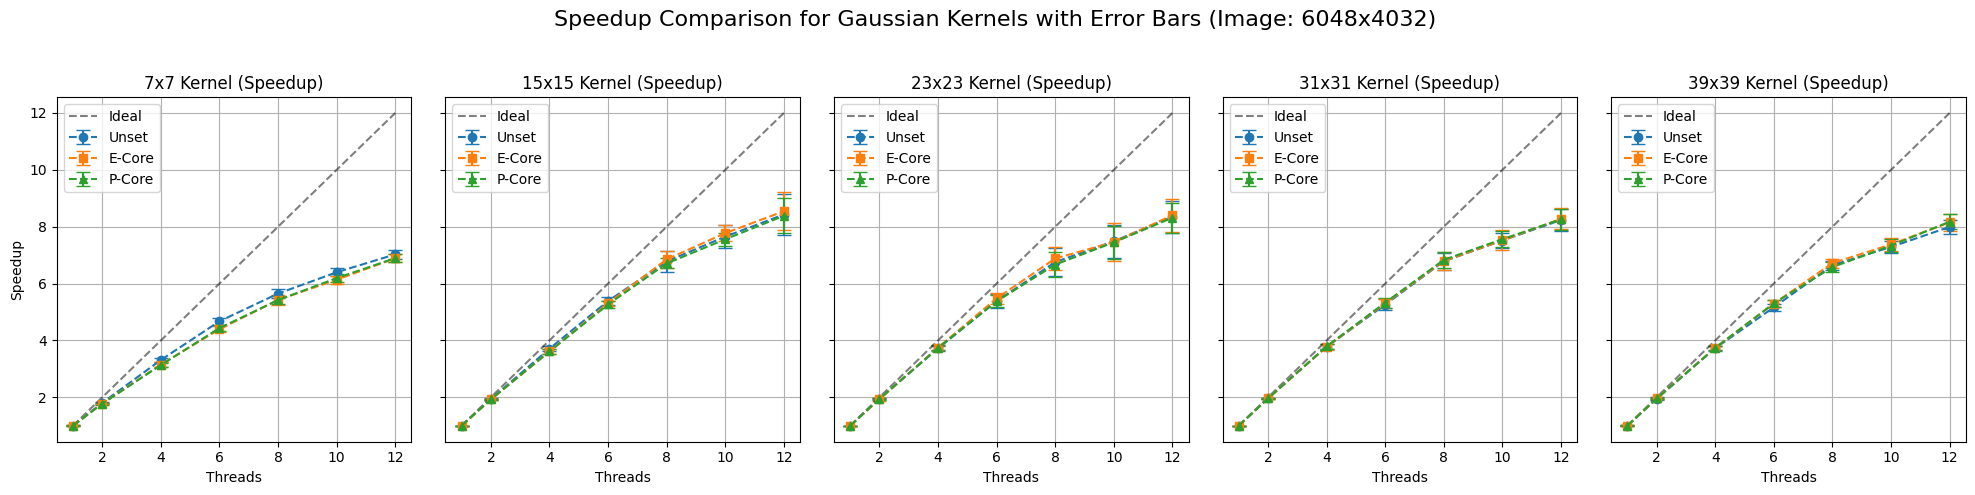

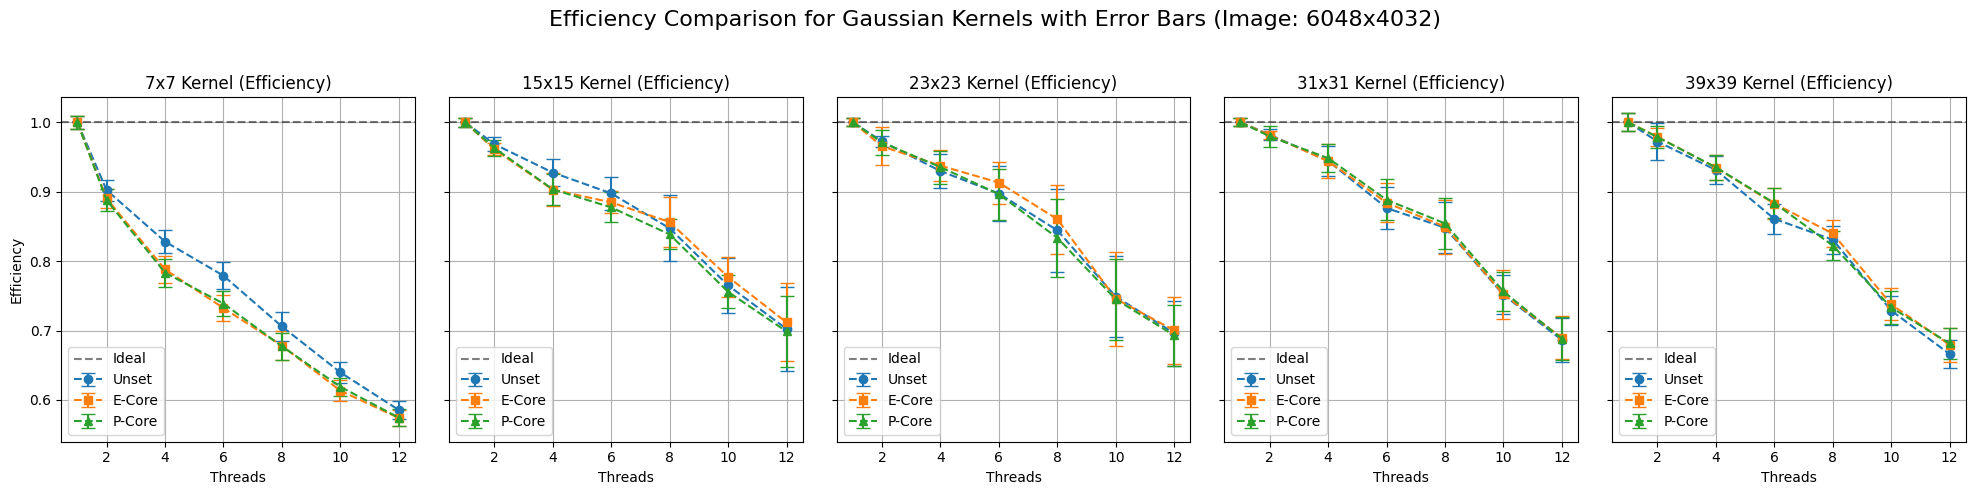

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = r'C:\Users\user\OneDrive\Masaüstü\runtime_new.xlsx'

kernel_labels = {
    'Gaussian': '7x7',
    'Gaussian (2)': '15x15',
    'Gaussian (3)': '23x23',
    'Gaussian (4)': '31x31',
    'Gaussian (5)': '39x39'
}

threads = [1, 2, 4, 6, 8, 10, 12]

# Create subplots for 5 kernel sizes (separate speedup and efficiency plots)
fig_speedup, axs_speedup = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
fig_efficiency, axs_efficiency = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Loop through each sheet and plot in the subplots
for i, (sheet_name, kernel_size) in enumerate(kernel_labels.items()):
    # Load the sheet as a DataFrame (without headers)
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None, engine='openpyxl')
    
    # Extract values for Unset
    serial_value = float(df.iloc[6, 2])  # Convert to float
    serial_std = float(df.iloc[17, 5])   # Convert to float
    
    # Extract parallel values and convert to numpy arrays
    unset_values = df.iloc[16:23, 2].astype(float).values  # C17:C23
    unset_std = df.iloc[16:23, 5].astype(float).values     # F17:F23
    
    # Extract values for E-Core
    ecore_values = df.iloc[16:23, 8].astype(float).values  # I17:I23
    ecore_std = df.iloc[16:23, 11].astype(float).values    # L17:L23
    
    # Extract values for P-Core
    pcore_values = df.iloc[16:23, 14].astype(float).values  # O17:O23
    pcore_std = df.iloc[16:23, 17].astype(float).values     # R17:R23

    # Calculate speedup with proper error propagation
    def calculate_speedup(serial, serial_std, parallel_values, parallel_std):
        speedup = serial / parallel_values
        # Error propagation formula: σ_speedup = speedup * √((σ_serial/serial)² + (σ_parallel/parallel)²)
        speedup_std = speedup * np.sqrt((serial_std/serial)**2 + (parallel_std/parallel_values)**2)
        return speedup, speedup_std
    
    # Calculate efficiency with proper error propagation
    def calculate_efficiency(speedup, speedup_std, threads):
        efficiency = speedup / threads
        # Error propagation formula: σ_efficiency = σ_speedup / threads
        efficiency_std = speedup_std / threads
        return efficiency, efficiency_std
    
    # Calculate for each configuration
    unset_speedup, unset_speedup_std = calculate_speedup(serial_value, serial_std, unset_values, unset_std)
    ecore_speedup, ecore_speedup_std = calculate_speedup(serial_value, serial_std, ecore_values, ecore_std)
    pcore_speedup, pcore_speedup_std = calculate_speedup(serial_value, serial_std, pcore_values, pcore_std)
    
    unset_efficiency, unset_efficiency_std = calculate_efficiency(unset_speedup, unset_speedup_std, threads)
    ecore_efficiency, ecore_efficiency_std = calculate_efficiency(ecore_speedup, ecore_speedup_std, threads)
    pcore_efficiency, pcore_efficiency_std = calculate_efficiency(pcore_speedup, pcore_speedup_std, threads)
        
    # Plotting speedup for the current kernel size with error bars
    axs_speedup[i].errorbar(threads, unset_speedup, yerr=unset_speedup_std, 
                           label='Unset', marker='o', linestyle='--', capsize=5)
    axs_speedup[i].errorbar(threads, ecore_speedup, yerr=ecore_speedup_std, 
                           label='E-Core', marker='s', linestyle='--', capsize=5)
    axs_speedup[i].errorbar(threads, pcore_speedup, yerr=pcore_speedup_std, 
                           label='P-Core', marker='^', linestyle='--', capsize=5)
    
    # Add ideal speedup line
    axs_speedup[i].plot(threads, threads, 'k--', label='Ideal', alpha=0.5)
    
    # Set title and labels for speedup
    axs_speedup[i].set_title(f'{kernel_size} Kernel (Speedup)')
    axs_speedup[i].set_xlabel('Threads')
    if i == 0:
        axs_speedup[i].set_ylabel('Speedup')
    axs_speedup[i].grid(True)
    axs_speedup[i].legend()
    
    # Plotting efficiency for the current kernel size with error bars
    axs_efficiency[i].errorbar(threads, unset_efficiency, yerr=unset_efficiency_std, 
                              label='Unset', marker='o', linestyle='--', capsize=5)
    axs_efficiency[i].errorbar(threads, ecore_efficiency, yerr=ecore_efficiency_std, 
                              label='E-Core', marker='s', linestyle='--', capsize=5)
    axs_efficiency[i].errorbar(threads, pcore_efficiency, yerr=pcore_efficiency_std, 
                              label='P-Core', marker='^', linestyle='--', capsize=5)
    
    # Add ideal efficiency line (100%)
    axs_efficiency[i].axhline(y=1.0, color='k', linestyle='--', label='Ideal', alpha=0.5)
    
    # Set title and labels for efficiency
    axs_efficiency[i].set_title(f'{kernel_size} Kernel (Efficiency)')
    axs_efficiency[i].set_xlabel('Threads')
    if i == 0:
        axs_efficiency[i].set_ylabel('Efficiency')
    axs_efficiency[i].grid(True)
    axs_efficiency[i].legend()

# Set overall titles
fig_speedup.suptitle('Speedup Comparison for Gaussian Kernels with Error Bars (Image: 6048x4032)', fontsize=16)
fig_efficiency.suptitle('Efficiency Comparison for Gaussian Kernels with Error Bars (Image: 6048x4032)', fontsize=16)

# Adjust layout for both figures
fig_speedup.tight_layout(rect=[0, 0, 1, 0.95])
fig_efficiency.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figures as PDFs
fig_speedup.savefig('speedup_gaussian_comparison_with_error_bars.pdf', format='pdf', dpi=300, bbox_inches='tight')
fig_efficiency.savefig('efficiency_gaussian_comparison_with_error_bars.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Optionally, you can show the plots
plt.show()